# Assignment: Numpy and Matplotlib

The goal of this assignment is to gain comfort creating, visualizating, and computing with numpy array. By the end of the assignment, you should feel comfortable:

```{admonition} Learning Goals
:class: tip

- Creating new arrays using `linspace` and `arange`
- Computing basic formulas with numpy arrays
- Loading data from `.npy` files
- Performing reductions (e.g. `mean`, `std` on numpy arrays)
- Making 1D line plots
- Making scatterplots
- Annotating plots with titles and axes
```

## 1 Creating and Manipulating Arrays

First import numpy and matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan
Both should cover the range (-2, 2) and have 100 points in each direction

In [2]:
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
xx, yy = np.meshgrid(x, y)
xx.shape, yy.shape

((100, 100), (100, 100))

### 1.2. Visualize each 2D array using `pcolormesh`

Use the correct coordiantes for the x and y axes.

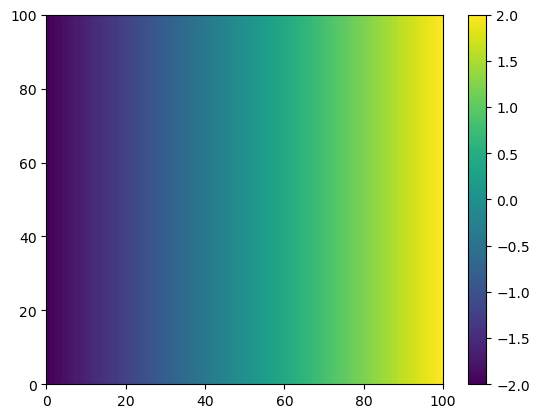

In [3]:
plt.pcolormesh(xx)
plt.colorbar();

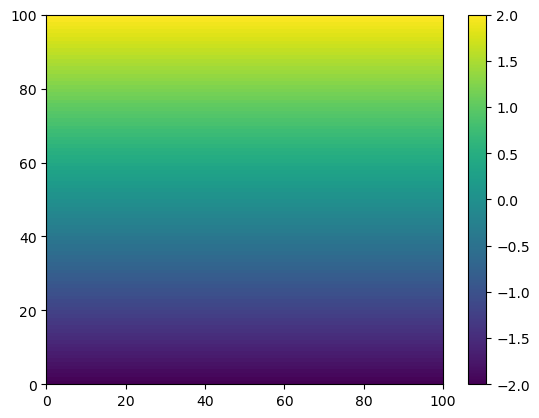

In [4]:
plt.pcolormesh(yy)
plt.colorbar();

### 1.3 From your cartesian coordinates, create polar coordinates $r$ and $\varphi$

Refer to the [wikipedia page](https://en.wikipedia.org/wiki/Polar_coordinate_system#Converting_between_polar_and_Cartesian_coordinates) for the conversion formula. You will need to use numpy's `arctan2` function. Read its documentation.


In [5]:
r = np.sqrt(xx**2 + yy**2)
phi = np.arctan2(yy,xx)
r.shape, phi.shape

((100, 100), (100, 100))

### 1.4. Visualize $r$ and $\varphi$ on the 2D  $x$ / $y$ plane using `pcolormesh`

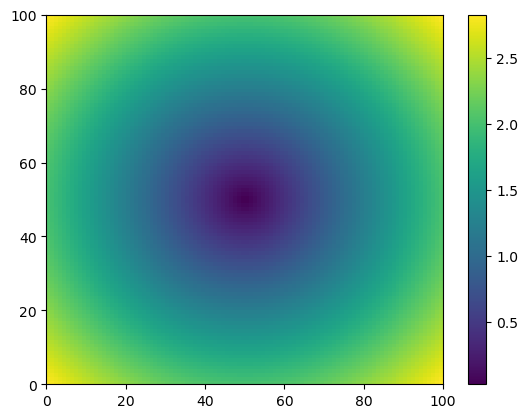

In [6]:
plt.pcolormesh(r)
plt.colorbar();

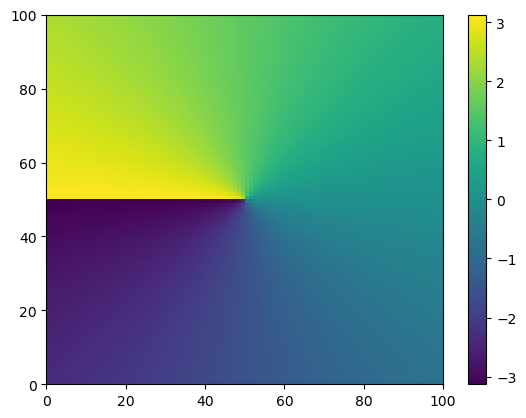

In [7]:
plt.pcolormesh(phi)
plt.colorbar();

### 1.5 Calculate the quantity $f = \cos^2(4r) + \sin^2(4\varphi)$

And plot it on the $x$ / $y$ plane

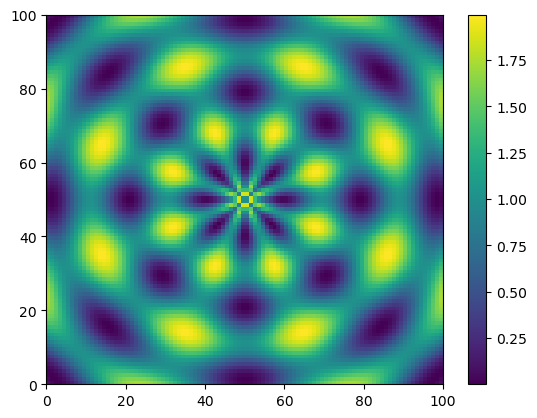

In [8]:
f = (np.cos(4*r))**2 + (np.sin(4*phi))**2

plt.pcolormesh(f)
plt.colorbar();

### 1.6 Plot the mean of f with respect to the x axis

as a function of y

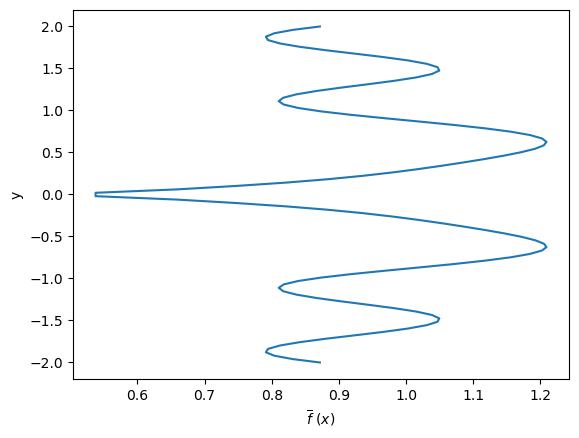

In [33]:
f_avg_x = np.mean(f, axis=0) 
plt.plot(f_avg_x,y)
plt.ylabel("y")
plt.xlabel(r"$\overline{f} \ (x)$");

### 1.7 Plot the mean of f with respect to the y axis

as a function of x

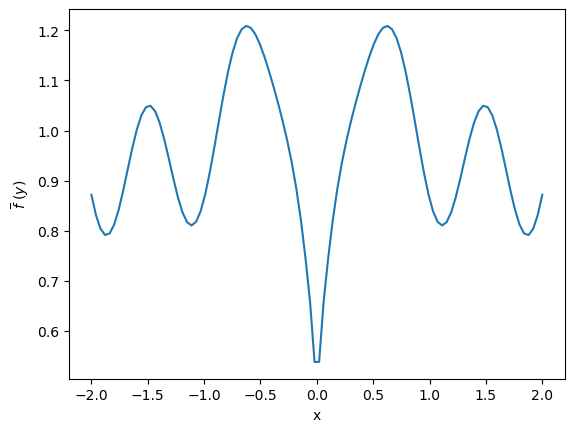

In [34]:
f_avg_y = np.mean(f, axis=1)
plt.plot(x,f_avg_y)
plt.xlabel("x")
plt.ylabel(r"$\overline{f} \ (y)$");

### 1.8 Plot the mean of $f$ with respect to $\phi$ as a function of $r$

This is hard. You will need to define a discrete range of $r$ values and then figure out how to average $f$ within the bins defined by your $r$ grid. There are many different ways to accomplish this.

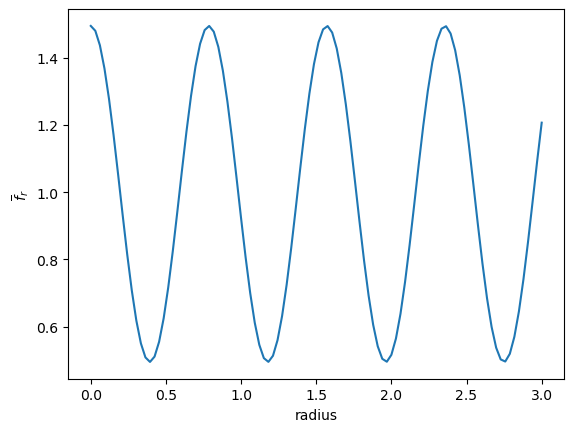

In [11]:
def f0(r, phi):
    return (np.cos(4*r))**2 + (np.sin(4*phi))**2

r0 = np.linspace(0,3,100)
phi0 = np.linspace(0,2*np.pi,100)

f_avg_r = np.zeros_like(r0)

for i in range(len(r0)):
    f_avg_r[i] = np.mean(f0(r0[i],phi0))
  
plt.plot(r0,f_avg_r);
plt.xlabel("radius");
plt.ylabel(r"$\overline{f}_r$");

In [12]:
#scrap code... 

# ind = np.zeros_like(r)

# delta = 0.1
# inner = 2

# for i in np.arange(r.shape[0]):
#     for j in np.arange(r.shape[1]):
#         if inner < r[i,j] <= inner+delta:
#             ind[i,j] = 1
#         f_avg_r0 = np.mean



# plt.pcolormesh(ind)



#r0_i is the value of r0 at i index
#for given r0 value, take all values of f (with phi ranging from 0-2pi) and average them
# for i,r0_i in np.ndenumerate(r0):
#     f_avg_r[i] = np.mean(f(r0_i,phi0))

## Part 2: Analyze [ARGO](http://www.argo.ucsd.edu) Data

In this problem, we use real data from ocean profiling floats.
ARGO floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. ARGO floats collect one "profile" (a set of messurements at different depths or "levels").

<img src="https://argo.ucsd.edu/wp-content/uploads/sites/361/2020/06/float_cycle_1.png" width="80%" />

Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let's start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise.
The following code will give you a list of `.npy` files that you can open in the next step.

In [13]:
import pooch
url = "https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash="2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files

['/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy',
 '/home/jovyan/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy']

### 2.1 Load each data file as a numpy array.

You can use whatever names you want for your arrays, but I recommend

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

**Note**: you have to actually look at the file name (the items in `files`) to know which files corresponds to which variable.


In [14]:
date = np.load(files[0])
lon = np.load(files[1])
lat = np.load(files[2])
T = np.load(files[3])
S = np.load(files[4])
P = np.load(files[5])
level = np.load(files[6])

### 2.2 Examine the shapes of T, S and P compared to `lon`, `lat`, `date` and `level`. How do you think they are related?

Based on the shapes, which dimensions do you think are shared among the arrays?

In [15]:
print(T.shape) 
print(S.shape)
print(P.shape)

print(lon.shape)
print(lat.shape)
print(date.shape)
print(level.shape)

#T, S, and P are all 75 x 78 matrices, while the lon, lat, date, and level are either 1 x 75 or 1 x 78 matrices. Level (1 x 78) is probably 
#related to the columns (78) of T, S, and P. lon, lat, and date (1 x 75) are probably related to the rows (75) of T, S, and P. 

(78, 75)
(78, 75)
(78, 75)
(75,)
(75,)
(75,)
(78,)


### 2.3 Make a plot for each column of data in T, S and P (three plots). 

The vertical scale should be the `levels` data. Each plot should have a line for each column of data. It will look messy.

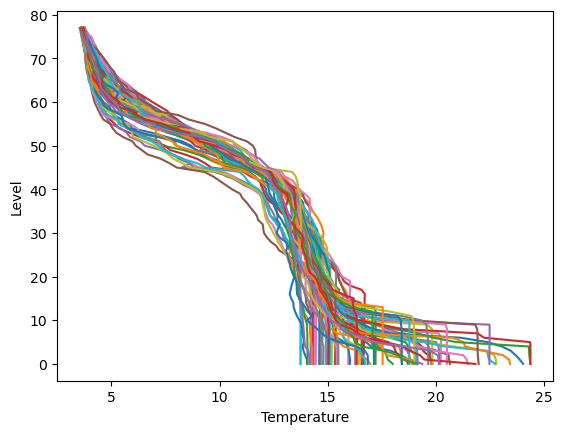

In [16]:
plt.plot(T, level)
plt.xlabel("Temperature")
plt.ylabel("Level")
plt.show()

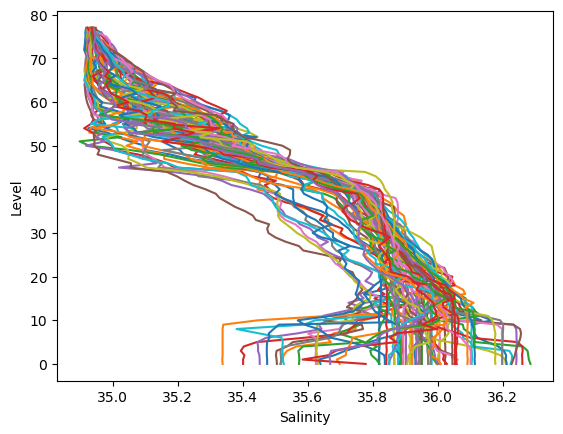

In [17]:
plt.plot(S, level)
plt.xlabel("Salinity")
plt.ylabel("Level")
plt.show()

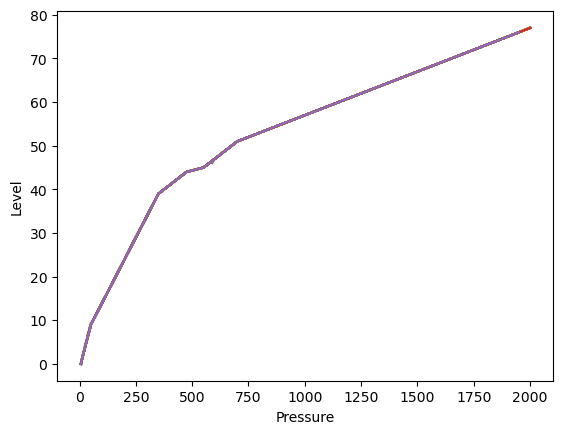

In [18]:
plt.plot(P, level)
plt.xlabel("Pressure")
plt.ylabel("Level")
plt.show()

### 2.4 Compute the mean and standard deviation of each of T, S and P at each depth in `level`.

In [19]:
T_avg = np.mean(T, axis=1)
S_avg = np.mean(S, axis=1)
P_avg = np.mean(P, axis=1)

T_std = np.std(T, axis=1)
S_std = np.std(S, axis=1)
P_std = np.std(P, axis=1)

### 2.5 Now make three similar plot, but show only the mean T, S and P at each depth. Show [error bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) on each plot using the standard deviations. 


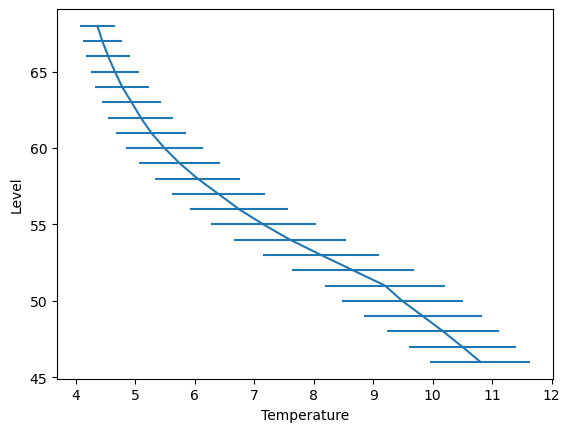

In [20]:
fig, ax = plt.subplots()
ax.errorbar(T_avg,level, xerr=T_std)
ax.set_xlabel("Temperature")
ax.set_ylabel("Level")
plt.show()

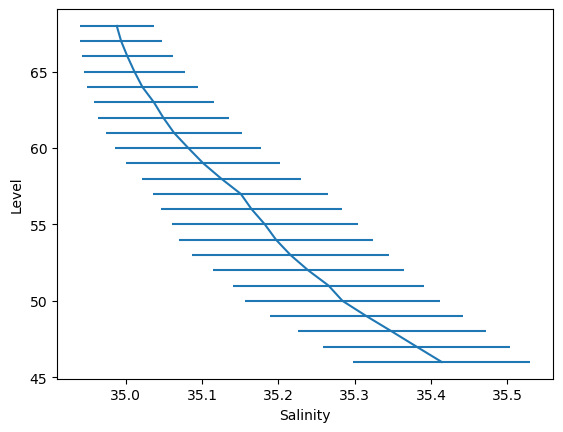

In [21]:
fig, ax = plt.subplots()
ax.errorbar(S_avg,level, xerr=S_std)
ax.set_xlabel("Salinity")
ax.set_ylabel("Level")
plt.show()

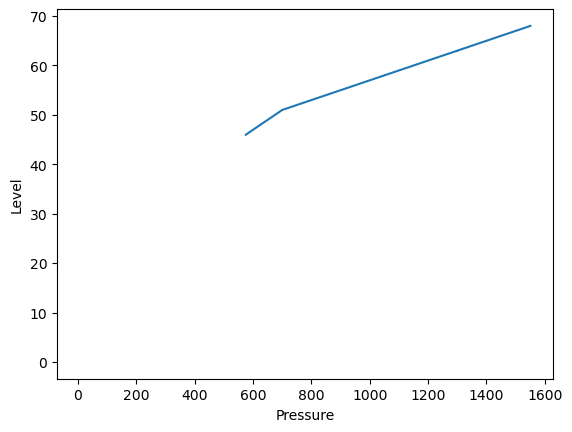

In [22]:
fig, ax = plt.subplots()
ax.errorbar(P_avg,level, xerr=P_std)
ax.set_xlabel("Pressure")
ax.set_ylabel("Level")
plt.show()

### 2.6 Account For Missing Data

The profiles contain many missing values. These are indicated by the special "Not a Number" value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes NaN. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

In [23]:
T_avg2 = np.nanmean(T, axis=1)
S_avg2 = np.nanmean(S, axis=1)
P_avg2 = np.nanmean(P, axis=1)

T_std2 = np.nanstd(T, axis=1)
S_std2 = np.nanstd(S, axis=1)
P_std2 = np.nanstd(P, axis=1)

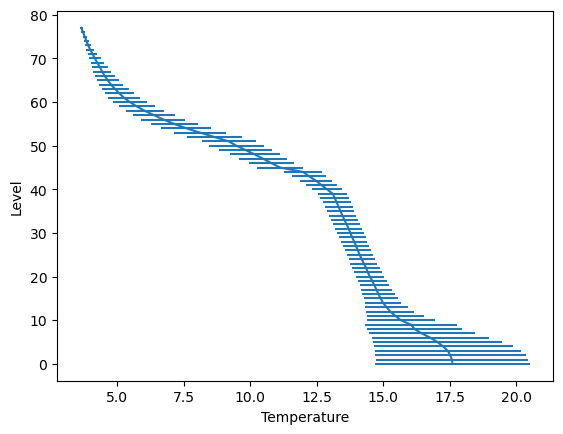

In [24]:
fig, ax = plt.subplots()
ax.errorbar(T_avg2,level, xerr=T_std2)
ax.set_xlabel("Temperature")
ax.set_ylabel("Level")
plt.show()

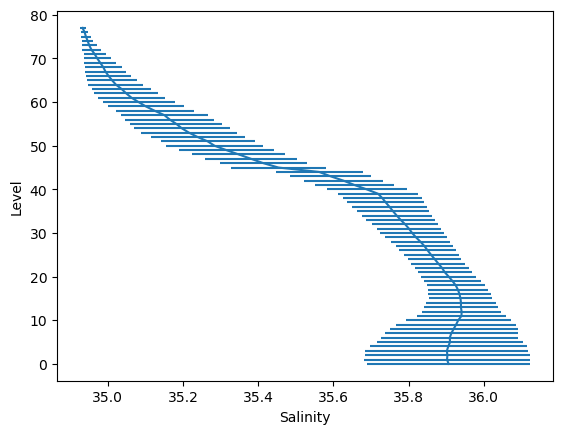

In [25]:
fig, ax = plt.subplots()
ax.errorbar(S_avg2,level, xerr=S_std2)
ax.set_xlabel("Salinity")
ax.set_ylabel("Level")
plt.show()

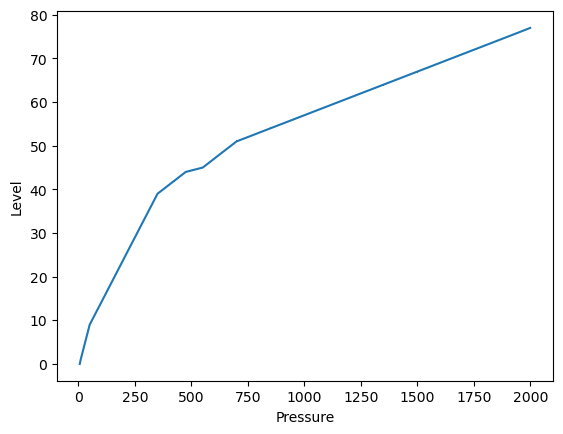

In [26]:
fig, ax = plt.subplots()
ax.errorbar(P_avg2,level, xerr=P_std2)
ax.set_xlabel("Pressure")
ax.set_ylabel("Level")
plt.show()

### 2.7 Create a scatter plot of the `lon`, `lat` positions of the ARGO float.

Use the [plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function.

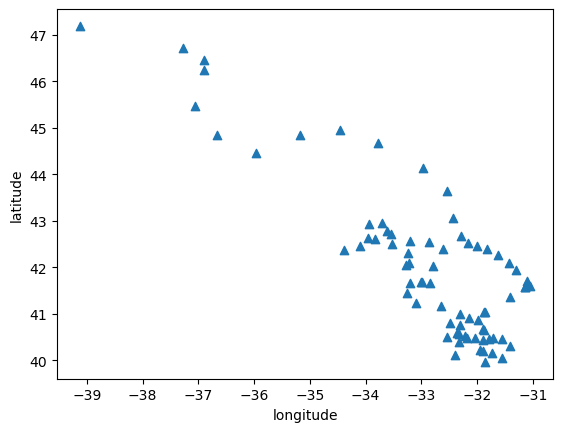

In [27]:
plt.scatter(lon, lat, marker='^')
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()